In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform, kstest

### Задача №1.2 a)

In [2]:
def generate_uniform_sample(n):
    # Генерация выборки из равномерного распределения U[0, 1]
    return np.random.uniform(0, 1, n)

def plot_distributions(sample):
    # Вар. ряд
    sorted_sample = np.sort(sample)
    # Вероятности для эмпирической функции распределения
    empirical_probs = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)

    plt.figure(figsize=(12, 6))
    plt.step(sorted_sample, empirical_probs, where='post', label='Эмпирическая функция распределения', linewidth=2)
    plt.plot(sorted_sample, sorted_sample, label='Теоретическая функция распределения U[0, 1]', color='red', linestyle='dashed')

    plt.title('Функция распределения и эмпирическая функция распределения')
    plt.xlabel('Значения выборки')
    plt.ylabel('Вероятность')
    plt.legend()
    plt.grid(True)
    plt.show()
    return 0

def kolmogorov_test(sample, alpha):
    # Использование критерия Колмогорова для проверки равномерности распределения
    statistic, p_value = kstest(sample, 'uniform')
    print(f'Статистика Колмогорова: {statistic:.4f}')
    print(f'P-значение: {p_value:.4f}')
    # Проверка равномерности
    if p_value < alpha:
        print(f'Гипотеза о равномерности распределения отвергается на уровне значимости {alpha}')
    else:
        print(f'Гипотеза о равномерности распределения не отвергается на уровне значимости {alpha}')
    return 0

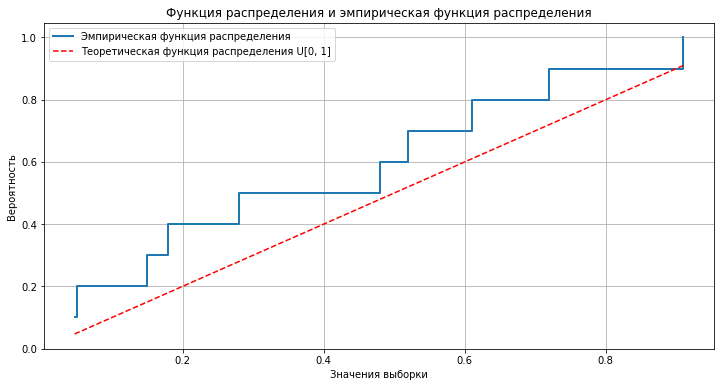

Статистика Колмогорова: 0.2200
P-значение: 0.6425
Гипотеза о равномерности распределения не отвергается на уровне значимости 0.05


In [4]:
# Пример из пункта 1a
alpha = 0.05

sample = [0.047, 0.05, 0.15, 0.18, 0.28, 0.48, 0.52, 0.61, 0.72, 0.91]
n = len(sample)

plot_distributions(sample)
kolmogorov_test(sample, alpha)

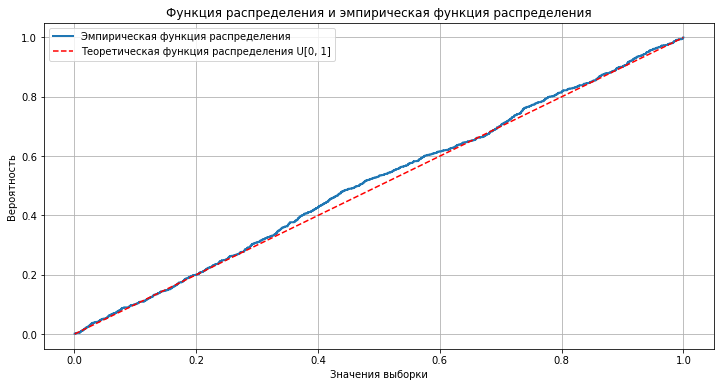

Статистика Колмогорова: 0.0415
P-значение: 0.0624
Гипотеза о равномерности распределения не отвергается на уровне значимости 0.05


In [6]:
n = 1000
alpha = 0.05

sample = generate_uniform_sample(n)
plot_distributions(sample)
kolmogorov_test(sample, alpha)

### Задача №1.2 b)

In [7]:
def generate_uniform_sample(n, a, b):
    # Генерация выборки из равномерного распределения U[a, b]
    return np.random.uniform(a, b, n)

def estimate_parameters(sample):
    # Оценка параметров a и b методом максимального правдоподобия
    a_hat = np.min(sample)
    b_hat = np.max(sample)
    return a_hat, b_hat

def transform_sample(sample, a, b):
    # Преобразование выборки к интервалу [0, 1]
    return (sample - a) / (b - a)

In [10]:
# Пример из пункта 1b
sample = [0.047, 0.05, 0.15, 0.18, 0.28, 0.48, 0.52, 0.61, 0.72, 0.91]

a_hat, b_hat = estimate_parameters(sample)
print(f'Оценки параметров: a = {a_hat}, b = {b_hat}')

transformed_sample = transform_sample(sample, a_hat, b_hat)

kolmogorov_test(transformed_sample, alpha)

Оценки параметров: a = 0.047, b = 0.91
Статистика Колмогорова: 0.2459
P-значение: 0.5050
Гипотеза о равномерности распределения не отвергается на уровне значимости 0.05


In [11]:
n = 1000
a = 0
b = 1
alpha = 0.05

sample = generate_uniform_sample(n, a, b)

a_hat, b_hat = estimate_parameters(sample)
print(f'Оценки параметров: a = {a_hat}, b = {b_hat}')

transformed_sample = transform_sample(sample, a_hat, b_hat)

kolmogorov_test(transformed_sample, alpha)

Оценки параметров: a = 0.0006418669651612197, b = 0.9999916086816091
Статистика Колмогорова: 0.0325
P-значение: 0.2356
Гипотеза о равномерности распределения не отвергается на уровне значимости 0.05


### Задача №2.2

In [24]:
def generate_exponential_sample(n, lam):
    return np.random.exponential(1/lam, n)

def plot_distributions(sample, theoretical_dist):
    sorted_sample = np.sort(sample)
    empirical_probs = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)
    
    plt.figure(figsize=(12, 6))
    plt.step(sorted_sample, empirical_probs, where='post', label='Эмпирическая функция распределения', linewidth=2)
    plt.plot(sorted_sample, theoretical_dist.cdf(sorted_sample), label='Теоретическая функция распределения', color='red', linestyle='dashed')
    plt.title('Функции распределения')
    plt.xlabel('Значения выборки')
    plt.ylabel('Вероятность')
    plt.legend()
    plt.grid(True)
    plt.show()

def test_exponentiality(sample, alpha):
    lam_hat = 1 / np.mean(sample)
    transformed_sample = lam_hat * sample
    statistic, p_value = kstest(transformed_sample, 'expon')
    print(f'Статистика: {statistic:.4f}, P-значение: {p_value:.4f}')
    if p_value < alpha:
        print(f'Гипотеза об экспоненциальности распределения отвергается на уровне значимости {alpha}')
    else:
        print(f'Гипотеза об экспоненциальности распределения не отвергается на уровне значимости {alpha}')

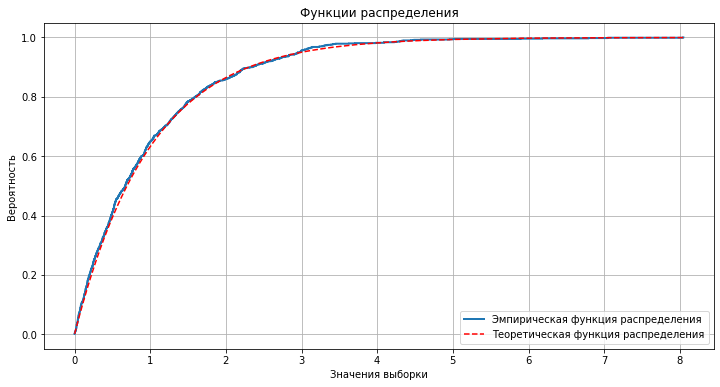

Статистика: 0.0248, P-значение: 0.5622
Гипотеза об экспоненциальности распределения не отвергается на уровне значимости 0.05


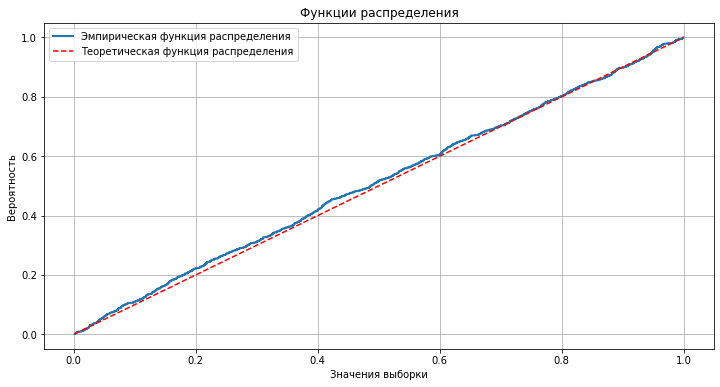

In [32]:
n = 1000
lam = 1
alpha = 0.05

sample = generate_exponential_sample(n, lam)
plot_distributions(sample, expon(scale=1/lam))
test_exponentiality(sample, alpha)
uniform_transformed = 1 - np.exp(-lam * sample)
plot_distributions(uniform_transformed, uniform())